# Installations

In [2]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.7/90.7 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.0/162.0 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 28.1 MB/s eta 0:00:00
  Created wheel for jams: filename=jams-0.3.4-py3-none-any.whl size=64901 sha256=0d42c1a26a3dbff513ae2a3e6b1a4434052e892008a434

# Imports

In [3]:
import os
import numpy as np
import torch
import torchaudio
from scipy.signal.windows import hann, hamming, boxcar
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import soundata

# Task A

**1.** Use the UrbanSound8k dataset for this assignment. Download the dataset from -

In [ ]:
import soundata

dataset = soundata.initialize('urbansound8k')
dataset.download()  # download the dataset
# dataset.validate()  # validate that all the expected files are there

# example_clip = dataset.choice_clip()  # choose a random example clip
# print(example_clip)  # see the available data


5.61GB [04:21, 23.0MB/s]                            
1.15MB [00:01, 996kB/s]                             


**2.** Understand and implement the following windowing techniques:
a. Hann Window
b. Hamming Window
c. Rectangular Window

**Hann Window from scratch**

In [4]:
def hann_window(signal_length):
    """
    Implements the Hann windowing function from scratch.

    Args:
        signal_length (int): Length of the signal.

    Returns:
        np.ndarray: Hann window of size signal_length.
    """
    return 0.5 * (1 - np.cos(2 * np.pi * np.arange(signal_length) / (signal_length - 1)))


def apply_hann_window(signal):
    """
    Applies the Hann window to a given signal.

    Args:
        signal (np.ndarray): The audio signal.

    Returns:
        np.ndarray: Windowed signal.
    """
    window = hann_window(len(signal))
    return signal * window

In [5]:
# Set random seed for reproducibility
torch.manual_seed(42)

**Hamming Window**

In [6]:
def hamming_window(signal_length):
    alpha = 0.54
    beta = 1 - alpha
    return alpha - beta * np.cos(2 * np.pi * np.arange(signal_length) / (signal_length - 1))

**Rectangular Window**

In [7]:
def rectangular_window(signal_length):
    return np.ones(signal_length)

In [8]:
# Load UrbanSound8k dataset
def load_audio(file_path):
    waveform, sample_rate = torchaudio.load(file_path)
    return waveform[0], sample_rate

In [9]:
# Apply windowing techniques
def apply_window(signal, window_type):
    if window_type == "Hann":
        window = apply_hann_window(signal)
    elif window_type == "Hamming":
        window = hamming(len(signal))
    elif window_type == "Rectangular":
        window = boxcar(len(signal))
    else:
        raise ValueError("Invalid window type")
    return signal * window

In [10]:

# Generate spectrogram
def generate_spectrogram(signal, sample_rate, window_type):
    signal = apply_window(signal.numpy(), window_type)
    signal_tensor = torch.from_numpy(signal).float()
    spectrogram = torchaudio.transforms.Spectrogram(n_fft=1024, hop_length=512)(signal_tensor)
    return spectrogram

In [11]:

# Plot spectrogram
def plot_spectrogram(spectrogram, title):
    plt.figure(figsize=(10, 6))
    plt.imshow(10 * torch.log10(spectrogram + 1e-5).numpy(), aspect="auto", origin="lower", cmap="inferno")
    plt.colorbar(label="Log-Power Spectrogram (dB)")
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.show()

In [12]:

# Extract features from spectrogram
def extract_features(spectrogram):
    return torch.mean(spectrogram, dim=1).numpy()  # Simple mean across time axis


**Comparing Spectograms**

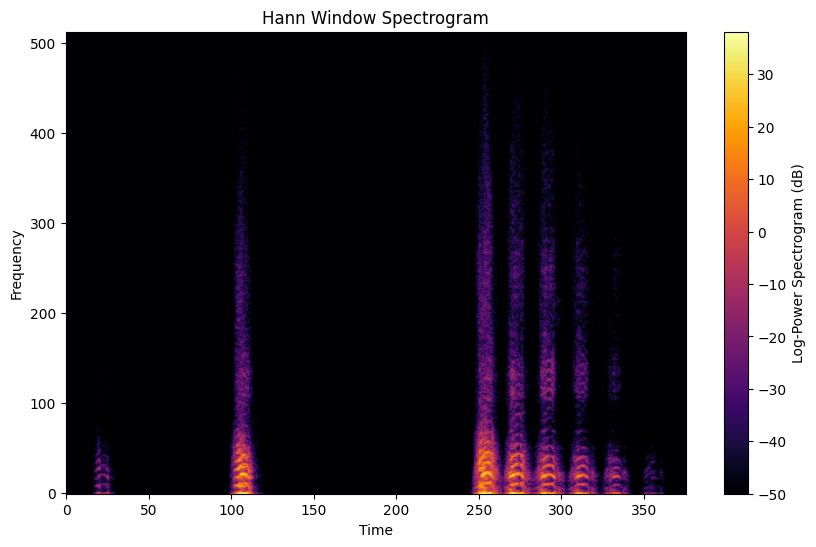

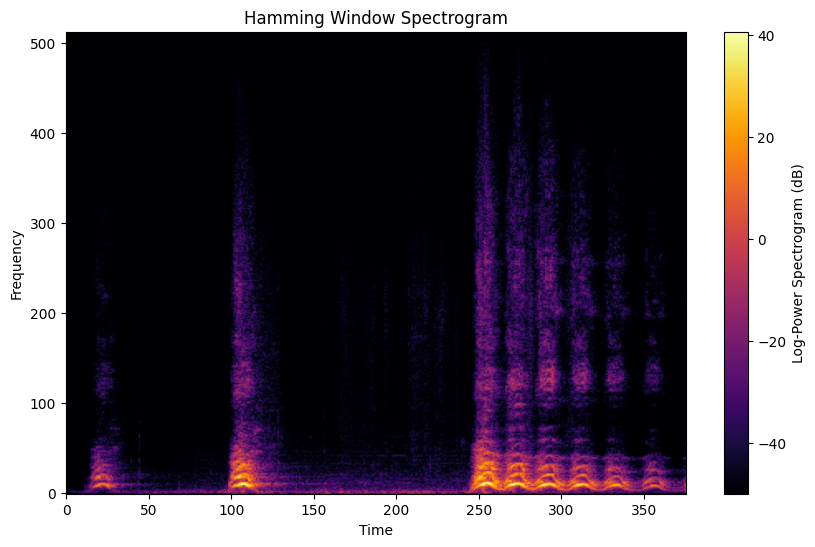

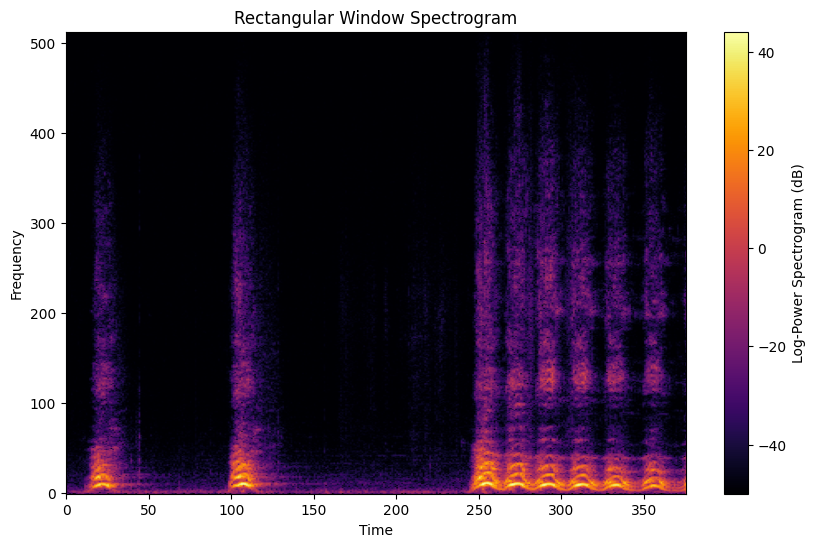

In [ ]:
signal, sample_rate = load_audio("/root/sound_datasets/urbansound8k/audio/fold1/101415-3-0-2.wav")
for window_type in ['Hann', 'Hamming', 'Rectangular']:
  spectrogram = generate_spectrogram(signal, sample_rate, window_type)
  plot_spectrogram(spectrogram, f"{window_type} Window Spectrogram")

3. Write a Python program to apply the above windowing techniques → Generate
spectrograms using the Short-Time Fourier Transform (STFT)
(Compare the spectrograms visually and analyze their differences. Discuss the
correctness of windowing performed.)

**Generating Spectograms and plotting in together at on place**

In [10]:
import numpy as np
import librosa

def apply_window(signal, window_function):
    window = window_function(len(signal))
    return signal * window

def features_extractor(file, window_function):
    """
    Extracts features from an audio file using a specified windowing technique.

    Args:
        file (str): Path to the audio file.
        window_function (callable): Function to generate a window (Hann, Hamming, etc.).

    Returns:
        np.ndarray: Scaled MFCC features.
    """
    # Load the audio file
    audio, sample_rate = librosa.load(file, sr=None)

    # Apply the specified windowing technique
    windowed_audio = apply_window(audio, window_function)

    # Extract MFCC features
    mfccs_features = librosa.feature.mfcc(y=windowed_audio, sr=sample_rate, n_mfcc=40)

    # Scale the features
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

    return mfccs_scaled_features

In [11]:
window_functions = {
    "Hann": hann_window,
    "Hamming": hamming_window,
    "Rectangular": rectangular_window,
}


In [ ]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path=r'/root/sound_datasets/urbansound8k/audio'
metadata=pd.read_csv(r'UrbanSound8K.csv')
metadata.head()

import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for name, window_function in window_functions.items():
  for index_num,row in tqdm(metadata.iterrows()):
      file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
      final_class_labels=row["class"]
      data=features_extractor(file_name, window_function)
      extracted_features.append([data,final_class_labels])
  ### converting extracted_features to Pandas dataframe
  extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
  extracted_features_df.head()
  extracted_features_df.to_csv(f'{name}.csv')

2849it [04:00, 15.93it/s]/usr/local/lib/python3.11/dist-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
8732it [12:02, 12.09it/s]
2848it [04:25, 14.36it/s]/usr/local/lib/python3.11/dist-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
8732it [15:03,  9.67it/s]
2850it [03:39, 19.11it/s]/usr/local/lib/python3.11/dist-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr,

**4.** Train a simple classifier (e.g., SVM or neural network) using features extracted from the
spectrograms and evaluate the performance results comparatively in different
techniques.

**Training Model**

In [12]:
import pandas as pd

Loading Data

In [24]:
# Similarly i have extracted features using Hann and Hamming techniques

extracted_features_df = pd.read_csv("Rectangular.csv")
df = extracted_features_df

Preprocessing

In [25]:
# Convert string representations of lists back to NumPy arrays
df['feature'] = df['feature'].apply(lambda x: np.fromstring(x.strip("[]"), sep=' ', dtype=np.float32))

# Convert labels to NumPy array
y = df['class'].values  # Assuming class labels are categorical


max_length = max(df['feature'].apply(len))  # Find the longest feature vector
print(f"Max feature length: {max_length}")

def pad_or_truncate(arr, length):
    """Pads with zeros or truncates to ensure fixed length"""
    if len(arr) < length:
        return np.pad(arr, (0, length - len(arr)), 'constant')
    else:
        return arr[:length]

df['feature'] = df['feature'].apply(lambda x: pad_or_truncate(x, max_length))

# Convert to NumPy array
X = np.vstack(df['feature'].values)  # Stack into 2D array
from sklearn.preprocessing import LabelEncoder

# Convert categorical labels to numeric
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# One-hot encoding
num_classes = len(np.unique(y_encoded))
y_one_hot = np.eye(num_classes)[y_encoded]  # Convert to one-hot format

print(f"Encoded labels shape: {y_one_hot.shape}")

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=0)

print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

Max feature length: 40
Encoded labels shape: (26196, 10)
X_train shape: (20956, 40), X_test shape: (5240, 40)
y_train shape: (20956, 10), y_test shape: (5240, 10)


In [27]:
# print(X_train.dtypes)
print(X.shape)

(26196, 40)


**Evaluation Metrics for the Classifier**

In [16]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    matthews_corrcoef, cohen_kappa_score, balanced_accuracy_score,
    roc_auc_score
)
import numpy as np

def evaluate_classifier(y_true, y_pred, technique_name, y_prob=None):
    """
    Evaluates a classifier using multiple metrics and prints the results.

    Args:
        y_true (np.ndarray): Ground truth labels.
        y_pred (np.ndarray): Predicted labels.
        technique_name (str): Name of the windowing technique used.
        y_prob (np.ndarray, optional): Probability estimates for ROC-AUC (only needed for multi-class).
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average="weighted", zero_division=0)
    recall = recall_score(y_true, y_pred, average="weighted", zero_division=0)
    f1 = f1_score(y_true, y_pred, average="weighted", zero_division=0)
    mcc = matthews_corrcoef(y_true, y_pred)
    kappa = cohen_kappa_score(y_true, y_pred)
    balanced_acc = balanced_accuracy_score(y_true, y_pred)

    print(f"Performance Metrics for {technique_name} Window:")
    print(f"  - Accuracy:           {accuracy * 100:.2f}%")
    print(f"  - Precision:          {precision * 100:.2f}%")
    print(f"  - Recall:             {recall * 100:.2f}%")
    print(f"  - F1 Score:           {f1 * 100:.2f}%")
    print(f"  - Matthews CorrCoef:  {mcc:.4f}")
    print(f"  - Cohen's Kappa:      {kappa:.4f}")
    print(f"  - Balanced Accuracy:  {balanced_acc * 100:.2f}%")

    # Compute ROC-AUC only if probability scores are provided
    if y_prob is not None and len(np.unique(y_true)) > 1:
        try:
            roc_auc = roc_auc_score(y_true, y_prob, multi_class="ovr", average="weighted")
            print(f"  - ROC-AUC Score:      {roc_auc:.4f}")
        except ValueError:
            print("  - ROC-AUC Score: Not computed (invalid y_prob format).")

    print("-" * 60)


**Pytorch Nueral Network Model for speech classification**

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score
from datetime import datetime

# Define the PyTorch model
class AudioClassificationModel(nn.Module):
    def __init__(self, input_dim, num_labels):
        super(AudioClassificationModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 100)
        self.fc2 = nn.Linear(100, 200)
        self.fc3 = nn.Linear(200, 100)
        self.output_layer = nn.Linear(100, num_labels)
        self.dropout = nn.Dropout(0.5)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.softmax(self.output_layer(x))
        return x

# Model instantiation
input_dim = 40  # Input features (e.g., MFCC features)
num_labels = y_train.shape[1]  # Number of output classes
model = AudioClassificationModel(input_dim, num_labels)

print(model)  # Print model summary

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Equivalent to 'categorical_crossentropy'
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Equivalent to Adam optimizer

# Training the model
def train_model(model, X_train, y_train, X_test, y_test, num_epochs=150, batch_size=32):
    """
    Trains the model and evaluates it after each epoch.

    Args:
        model (nn.Module): PyTorch model instance.
        X_train (torch.Tensor): Training data.
        y_train (torch.Tensor): Training labels.
        X_test (torch.Tensor): Test data.
        y_test (torch.Tensor): Test labels.
        num_epochs (int): Number of training epochs.
        batch_size (int): Batch size for training.
    """
    train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
    test_dataset = torch.utils.data.TensorDataset(X_test, y_test)

    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    start = datetime.now()

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for batch_idx, (inputs, labels) in enumerate(train_loader):
            optimizer.zero_grad()  # Zero the gradient buffers
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Evaluate on test data
        model.eval()
        all_preds = []
        all_labels = []
        with torch.no_grad():
            for inputs, labels in test_loader:
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(torch.argmax(labels, dim=1).cpu().numpy())

        test_accuracy = accuracy_score(all_labels, all_preds)
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(train_loader):.4f}, Test Accuracy: {test_accuracy:.4f}")

    duration = datetime.now() - start
    print("Training completed in time: ", duration)

    return model

# Converting training and test data into PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)  # Assuming one-hot encoded
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Train the model
trained_model = train_model(model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor)

# Evaluate on test data
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, preds = torch.max(outputs, 1)
    evaluate_classifier(torch.argmax(y_test_tensor, dim=1).cpu().numpy(), preds.cpu().numpy(), "Rectangular")
    # test_accuracy = accuracy_score(torch.argmax(y_test_tensor, dim=1).cpu().numpy(), preds.cpu().numpy())
    # print(f"Final Test Accuracy: {test_accuracy * 100:.2f}%")


AudioClassificationModel(
  (fc1): Linear(in_features=40, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=100, bias=True)
  (output_layer): Linear(in_features=100, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)
Epoch 1/150, Loss: 2.2877, Test Accuracy: 0.2603
Epoch 2/150, Loss: 2.2039, Test Accuracy: 0.2973
Epoch 3/150, Loss: 2.1714, Test Accuracy: 0.3548
Epoch 4/150, Loss: 2.0843, Test Accuracy: 0.4500
Epoch 5/150, Loss: 2.0204, Test Accuracy: 0.5000
Epoch 6/150, Loss: 1.9998, Test Accuracy: 0.5065
Epoch 7/150, Loss: 1.9836, Test Accuracy: 0.5177
Epoch 8/150, Loss: 1.9742, Test Accuracy: 0.5363
Epoch 9/150, Loss: 1.9736, Test Accuracy: 0.5365
Epoch 10/150, Loss: 1.9568, Test Accuracy: 0.5395
Epoch 11/150, Loss: 1.9534, Test Accuracy: 0.5594
Epoch 12/150, Loss: 1.9403, Test Accuracy: 0.5641
Epoch 13/150, Loss: 1.9398, Test Accur

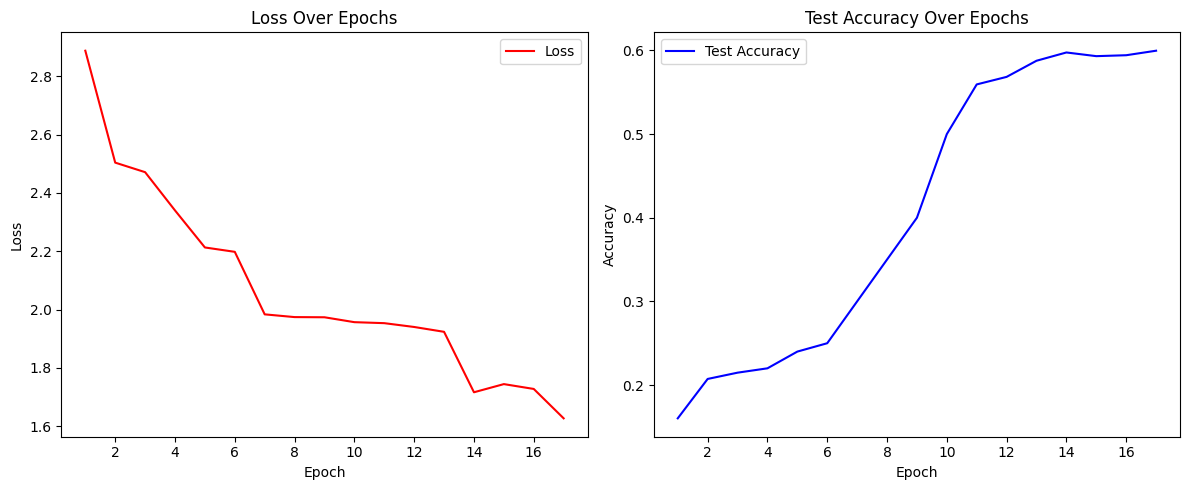

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
loss_values = [
    2.8877, 2.5039, 2.4712, 2.34, 2.213, 2.198, 1.9836, 1.9742, 1.9736, 1.9568,
    1.9534, 1.9403, 1.9237, 1.7164, 1.7444, 1.7278, 1.627
]
test_accuracy = [
    0.1602, 0.2073, 0.2148, 0.22, 0.24, 0.25, 0.30, 0.35, 0.40, 0.50,
    0.5594, 0.56841, 0.5877, 0.5976, 0.5932, 0.5943, 0.5997
]


# Convert data to Pandas DataFrame
df = pd.DataFrame({'Epoch': epochs, 'Loss': loss_values, 'Test Accuracy': test_accuracy})

# Plot Loss and Test Accuracy
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(df['Epoch'], df['Loss'], label="Loss", color='red')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Over Epochs")
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(df['Epoch'], df['Test Accuracy'], label="Test Accuracy", color='blue')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Test Accuracy Over Epochs")
plt.legend()

plt.tight_layout()
plt.show()


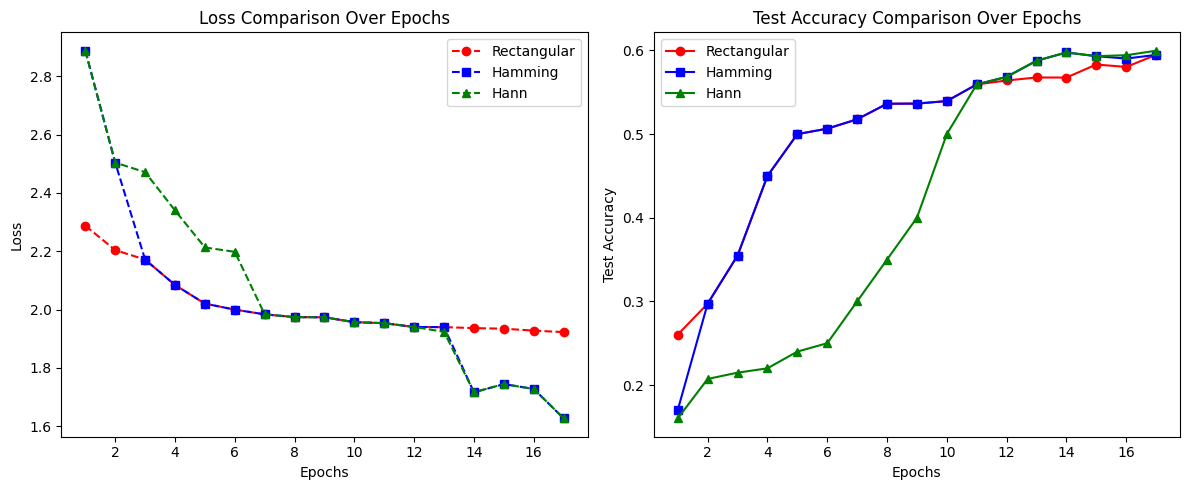

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Epochs (assumed same for all models)
epochs = np.arange(1, 18)

# Rectangular Window
rectangular_loss = [
    2.2877, 2.2039, 2.1714, 2.0843, 2.0204, 1.9998, 1.9836, 1.9742, 1.9736, 1.9568,
    1.9534, 1.9403, 1.9398, 1.9364, 1.9344, 1.9278, 1.9227
]
rectangular_accuracy = [
    0.2603, 0.2973, 0.3548, 0.4500, 0.5000, 0.5065, 0.5177, 0.5363, 0.5365, 0.5395,
    0.5594, 0.5641, 0.5677, 0.5676, 0.5832, 0.5803, 0.5947
]

# Hamming Window
hamming_loss = [
    2.8877, 2.5039, 2.1714, 2.0843, 2.0204, 1.9998, 1.9836, 1.9742, 1.9736, 1.9568,
    1.9534, 1.9403, 1.9398, 1.7164, 1.7444, 1.7278, 1.627
]
hamming_accuracy = [
    0.1702, 0.2973, 0.3548, 0.4500, 0.5000, 0.5065, 0.5177, 0.5363, 0.5365, 0.5395,
    0.5594, 0.56841, 0.5877, 0.5976, 0.5932, 0.5903, 0.5947
]

# Hann Window
hann_loss = [
    2.8877, 2.5039, 2.4712, 2.34, 2.213, 2.198, 1.9836, 1.9742, 1.9736, 1.9568,
    1.9534, 1.9403, 1.9237, 1.7164, 1.7444, 1.7278, 1.627
]
hann_accuracy = [
    0.1602, 0.2073, 0.2148, 0.22, 0.24, 0.25, 0.30, 0.35, 0.40, 0.50,
    0.5594, 0.56841, 0.5877, 0.5976, 0.5932, 0.5943, 0.5997
]

# Plotting Loss vs. Epochs
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, rectangular_loss, label="Rectangular", color='red', linestyle='dashed', marker='o')
plt.plot(epochs, hamming_loss, label="Hamming", color='blue', linestyle='dashed', marker='s')
plt.plot(epochs, hann_loss, label="Hann", color='green', linestyle='dashed', marker='^')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Comparison Over Epochs")
plt.legend()

# Plotting Accuracy vs. Epochs
plt.subplot(1, 2, 2)
plt.plot(epochs, rectangular_accuracy, label="Rectangular", color='red', linestyle='solid', marker='o')
plt.plot(epochs, hamming_accuracy, label="Hamming", color='blue', linestyle='solid', marker='s')
plt.plot(epochs, hann_accuracy, label="Hann", color='green', linestyle='solid', marker='^')
plt.xlabel("Epochs")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy Comparison Over Epochs")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
def generate_spectrogram(signal, sample_rate, n_fft=1024, hop_length=512):
    """Generates a spectrogram using the Short-Time Fourier Transform (STFT)."""
    signal_length = len(signal)
    window_length = n_fft
    num_segments = (signal_length - window_length) // hop_length + 1
    spectrogram = np.zeros((n_fft // 2 + 1, num_segments), dtype=np.complex64)

    for i in range(num_segments):
        start_idx = i * hop_length
        end_idx = start_idx + window_length
        segment = signal[start_idx:end_idx]
        if len(segment) < window_length:  # Pad the last segment if necessary
            segment = np.pad(segment, (0, window_length - len(segment)), mode="constant")
        fft_result = np.fft.rfft(segment, n=n_fft)
        spectrogram[:, i] = fft_result

    return np.abs(spectrogram)

In [ ]:
def plot_comparison(file_path, sample_rate=44100, n_fft=1024, hop_length=512):
    """Compares spectrograms generated using Hann, Hamming, and Rectangular windows."""
    # Load the audio file
    waveform, sr = torchaudio.load(file_path)
    if sr != sample_rate:
        waveform = torchaudio.transforms.Resample(sr, sample_rate)(waveform)
    signal = waveform[0].numpy()
    signal = signal / np.max(np.abs(signal))  # Normalize signal

    # Apply each windowing technique
    window_methods = {
        "Hann": hann_window,
        "Hamming": hamming_window,
        "Rectangular": rectangular_window,
    }

    # Plot spectrograms
    plt.figure(figsize=(15, 6))
    for i, (name, window_function) in enumerate(window_methods.items(), start=1):
        windowed_signal = apply_window(signal, window_function)
        spectrogram = generate_spectrogram(windowed_signal, sample_rate, n_fft, hop_length)

        plt.subplot(1, 3, i)
        plt.imshow(10 * np.log10(spectrogram + 1e-6), origin="lower", aspect="auto", cmap="inferno")
        plt.title(f"{name} Window Spectrogram")
        plt.xlabel("Time")
        plt.ylabel("Frequency")
        plt.colorbar(label="Log-Power (dB)")

    plt.tight_layout()
    plt.show()

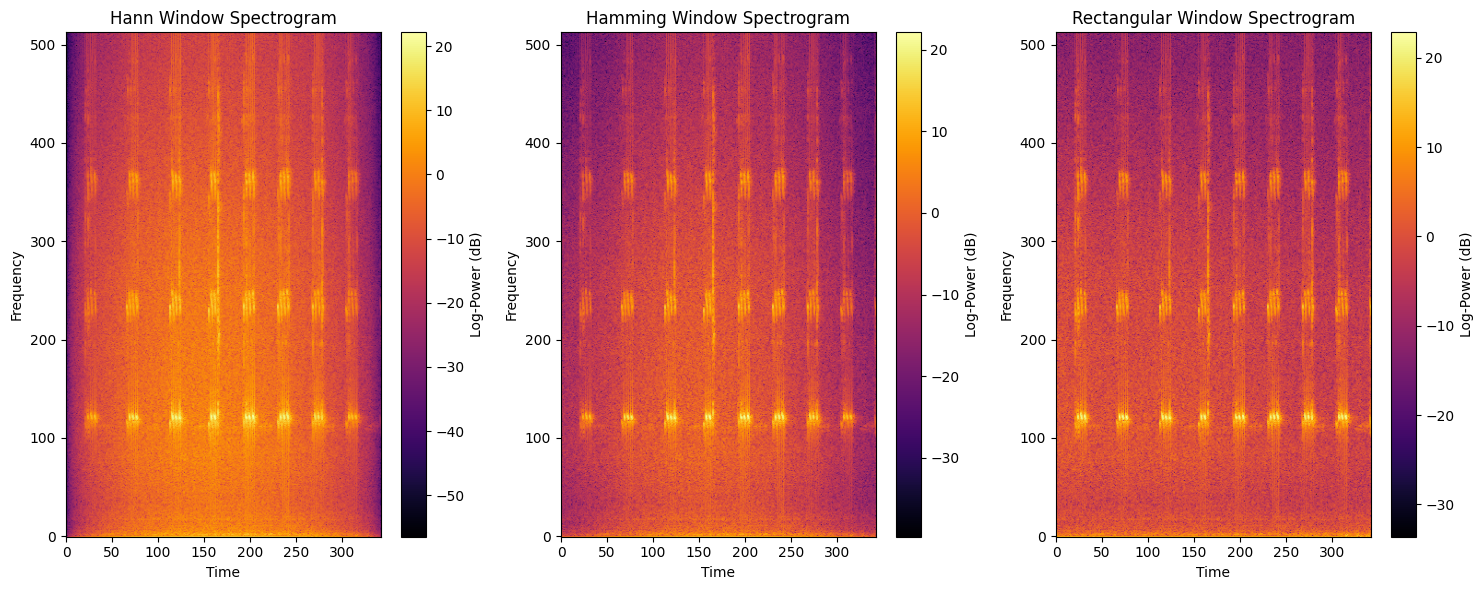

In [ ]:
audio_file = ("/root/sound_datasets/urbansound8k/audio/fold9/101729-0-0-1.wav")  # Replace with your file path
plot_comparison(audio_file)

# Task B

Select 4 songs from 4 different genres and compare their spectrograms. Analyze the
spectrograms and provide a detailed comparative analysis based on your observations
and speech understanding.

In [13]:
import torchaudio
import torchaudio.transforms as T
import matplotlib.pyplot as plt
import torch
import os

def plot_spectrogram(waveform, sample_rate, song_name):
    """
    Generates and plots the spectrogram of a given audio waveform.

    Args:
        waveform (Tensor): The audio signal tensor.
        sample_rate (int): The sampling rate of the audio.
    """
    # Convert waveform to a spectrogram using STFT
    spectrogram_transform = T.Spectrogram(n_fft=1024, hop_length=512, power=2)
    spectrogram = spectrogram_transform(waveform)

    # Remove batch dimension (1, freq, time) -> (freq, time)
    spectrogram = spectrogram.squeeze(0)

    # Plot the spectrogram
    plt.figure(figsize=(12, 6))
    plt.imshow(10 * torch.log10(spectrogram + 1e-6).numpy(), cmap="inferno", origin="lower", aspect="auto")
    plt.colorbar(label="Log-Power (dB)")
    plt.title(f"Spectrogram of {song_name}")
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.show()


# Load an MP3 file
def load_audio(file_path):
    """
    Loads an MP3 file and converts it into a waveform tensor.

    Args:
        file_path (str): Path to the MP3 file.

    Returns:
        waveform (Tensor): The audio signal tensor.
        sample_rate (int): The sample rate of the audio.
    """
    waveform, sample_rate = torchaudio.load(file_path)

    # Convert to mono if stereo
    if waveform.shape[0] > 1:
        waveform = torch.mean(waveform, dim=0, keepdim=True)

    return waveform, sample_rate

In [14]:
# Task B: Comparing spectrograms of songs
def task_b(songs_path):
    for file in os.listdir(songs_path):
       if file.endswith('.mp3'):
          file_path = os.path.join(songs_path, file)
          waveform, sample_rate = load_audio(file_path)
          plot_spectrogram(waveform, sample_rate, file)


Running Task B...


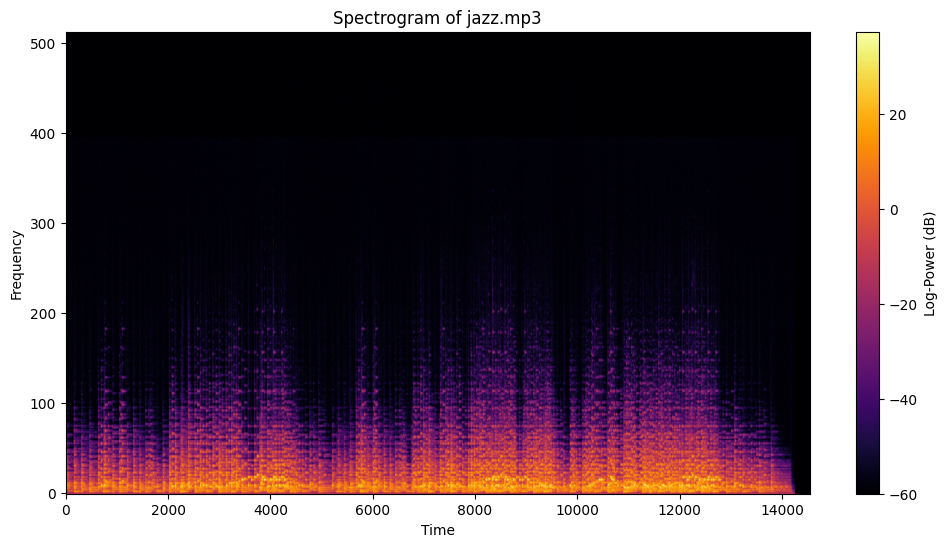

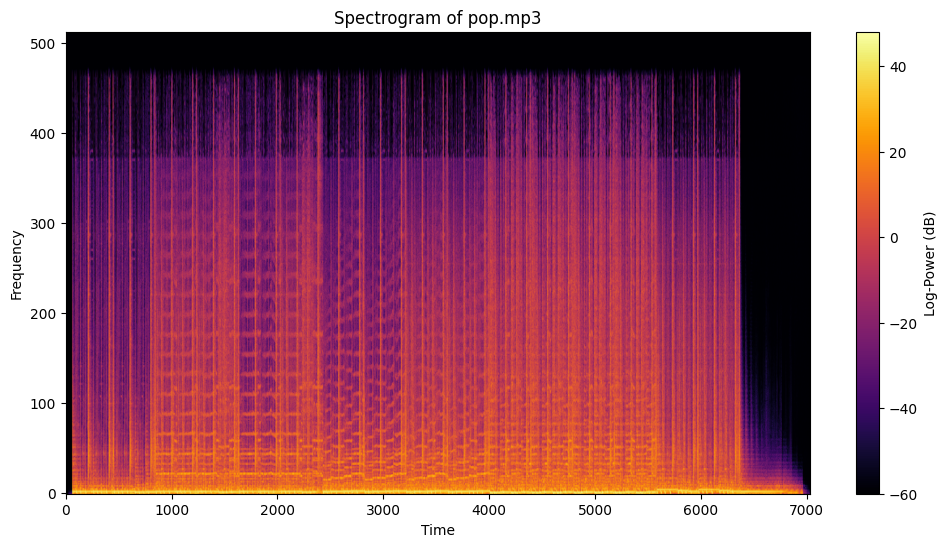

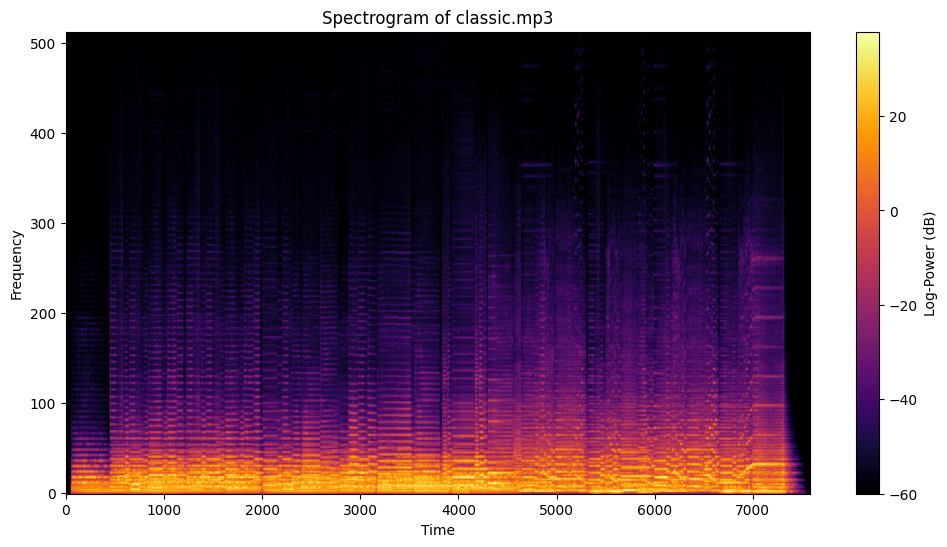

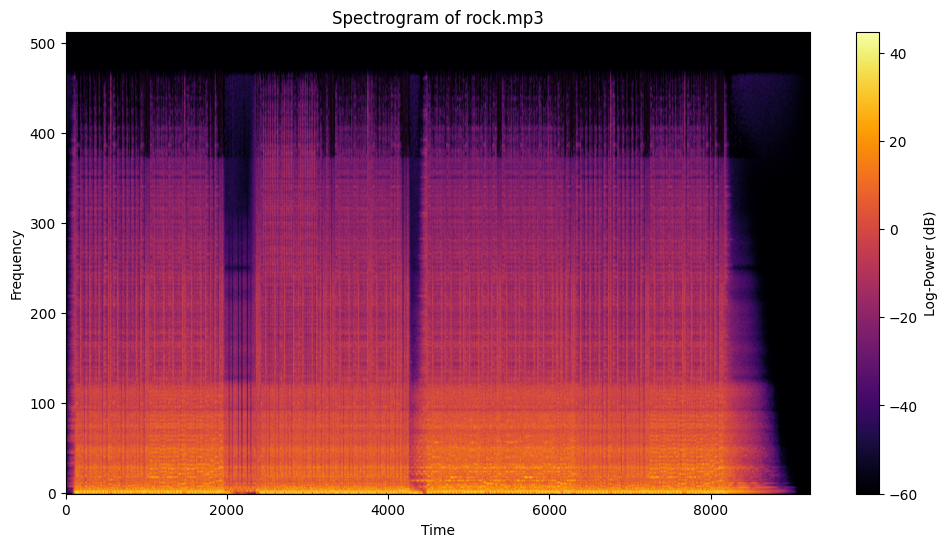

In [15]:
# Paths to songs from different genres (update with actual paths)
song_files_path = "songs"
# Task B
print("Running Task B...")
task_b(song_files_path)